In [6]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [7]:
df=pd.read_csv("data.csv")
df

,Date,Product_ID,Product_Category,Brand,Average_Damage_Rate,Refund_Rate,Avg_Time_Between_Stockouts,Avg_Quantity_Per_Order,Current_Inventory_Quantity,Maximum_Quantity_in_Stock,Current_Inventory_Levels,Storage_Time,Quantity_Released
0,1/1/2022,101,Electronics,BrandC,0.016,0.050,35.0,12,845,1200,High,32,11
1,1/2/2022,101,Electronics,BrandC,0.016,0.050,35.0,12,834,1200,Medium,33,28
2,1/3/2022,101,Electronics,BrandC,0.016,0.050,35.0,12,806,1200,Medium,34,18
3,1/4/2022,101,Electronics,BrandC,0.016,0.050,35.0,12,788,1200,Medium,35,15
4,1/5/2022,101,Electronics,BrandC,0.016,0.050,35.0,12,773,1200,Medium,36,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2003,12/27/2022,165,Electronics,Brand_Y,0.002,0.003,50.0,18,6114,7000,High,5,130
2004,12/28/2022,165,Electronics,Brand_Y,0.005,0.002,50.0,18,5984,7000,High,6,118
2005,12/29/2022,165,Electronics,Brand_Y,0.003,0.001,50.0,18,5866,7000,High,7,110
2006,12/30/2022,165,Electronics,Brand_Y,0.003,0.002,50.0,18,5756,7000,High,8,108


In [8]:
df["Date"]=pd.to_datetime(df["Date"])
df['day_of_week'] = df['Date'].dt.dayofweek
df['month'] = df['Date'].dt.month
df['quarter'] = pd.to_datetime(df['Date']).dt.quarter

df = pd.get_dummies(df, columns=['Product_Category', 'Brand',"Current_Inventory_Levels"], drop_first=True)

In [9]:
df

,Date,Product_ID,Average_Damage_Rate,Refund_Rate,Avg_Time_Between_Stockouts,Avg_Quantity_Per_Order,Current_Inventory_Quantity,Maximum_Quantity_in_Stock,Storage_Time,Quantity_Released,...,Product_Category_Tet Holiday Decorations,Product_Category_Winter Clothing,Brand_BrandA,Brand_BrandC,Brand_Brand_F,Brand_Brand_T,Brand_Brand_Y,Brand_Brand_Z,Current_Inventory_Levels_Low,Current_Inventory_Levels_Medium
0,2022-01-01,101,0.016,0.050,35.0,12,845,1200,32,11,...,False,False,False,True,False,False,False,False,False,False
1,2022-01-02,101,0.016,0.050,35.0,12,834,1200,33,28,...,False,False,False,True,False,False,False,False,False,True
2,2022-01-03,101,0.016,0.050,35.0,12,806,1200,34,18,...,False,False,False,True,False,False,False,False,False,True
3,2022-01-04,101,0.016,0.050,35.0,12,788,1200,35,15,...,False,False,False,True,False,False,False,False,False,True
4,2022-01-05,101,0.016,0.050,35.0,12,773,1200,36,17,...,False,False,False,True,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2003,2022-12-27,165,0.002,0.003,50.0,18,6114,7000,5,130,...,False,False,False,False,False,False,True,False,False,False
2004,2022-12-28,165,0.005,0.002,50.0,18,5984,7000,6,118,...,False,False,False,False,False,False,True,False,False,False
2005,2022-12-29,165,0.003,0.001,50.0,18,5866,7000,7,110,...,False,False,False,False,False,False,True,False,False,False
2006,2022-12-30,165,0.003,0.002,50.0,18,5756,7000,8,108,...,False,False,False,False,False,False,True,False,False,False


In [10]:
X=df.drop(["Date","Quantity_Released"],axis=1)
Y=df["Quantity_Released"]

In [11]:
X

,Product_ID,Average_Damage_Rate,Refund_Rate,Avg_Time_Between_Stockouts,Avg_Quantity_Per_Order,Current_Inventory_Quantity,Maximum_Quantity_in_Stock,Storage_Time,day_of_week,month,...,Product_Category_Tet Holiday Decorations,Product_Category_Winter Clothing,Brand_BrandA,Brand_BrandC,Brand_Brand_F,Brand_Brand_T,Brand_Brand_Y,Brand_Brand_Z,Current_Inventory_Levels_Low,Current_Inventory_Levels_Medium
0,101,0.016,0.050,35.0,12,845,1200,32,5,1,...,False,False,False,True,False,False,False,False,False,False
1,101,0.016,0.050,35.0,12,834,1200,33,6,1,...,False,False,False,True,False,False,False,False,False,True
2,101,0.016,0.050,35.0,12,806,1200,34,0,1,...,False,False,False,True,False,False,False,False,False,True
3,101,0.016,0.050,35.0,12,788,1200,35,1,1,...,False,False,False,True,False,False,False,False,False,True
4,101,0.016,0.050,35.0,12,773,1200,36,2,1,...,False,False,False,True,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2003,165,0.002,0.003,50.0,18,6114,7000,5,1,12,...,False,False,False,False,False,False,True,False,False,False
2004,165,0.005,0.002,50.0,18,5984,7000,6,2,12,...,False,False,False,False,False,False,True,False,False,False
2005,165,0.003,0.001,50.0,18,5866,7000,7,3,12,...,False,False,False,False,False,False,True,False,False,False
2006,165,0.003,0.002,50.0,18,5756,7000,8,4,12,...,False,False,False,False,False,False,True,False,False,False


In [12]:
X.dtypes

Product_ID                                    int64
Average_Damage_Rate                         float64
Refund_Rate                                 float64
Avg_Time_Between_Stockouts                  float64
Avg_Quantity_Per_Order                        int64
Current_Inventory_Quantity                    int64
Maximum_Quantity_in_Stock                     int64
Storage_Time                                  int64
day_of_week                                   int32
month                                         int32
quarter                                       int32
Product_Category_Electronics                   bool
Product_Category_Food                          bool
Product_Category_Rain Gear                     bool
Product_Category_Tet Holiday Decorations       bool
Product_Category_Winter Clothing               bool
Brand_BrandA                                   bool
Brand_BrandC                                   bool
Brand_Brand_F                                  bool
Brand_Brand_

In [13]:
ST=StandardScaler()

columns_to_scale = ["Avg_Quantity_Per_Order", "Avg_Time_Between_Stockouts", 
                    "Current_Inventory_Quantity", "Maximum_Quantity_in_Stock", "Storage_Time"]

X[columns_to_scale] = ST.fit_transform(X[columns_to_scale])


In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=46)

RANDOM FOREST

In [15]:
model=RandomForestRegressor()

In [16]:
param_grid = {
    "n_estimators": [5,6,50,100],
    "criterion": ["squared_error","absolute_error","poisson"],
    "max_depth": [None, 5],
    "min_samples_leaf": [2,5,10]
}

In [17]:
regress=GridSearchCV(estimator=model,param_grid=param_grid,cv=5)

In [18]:
regress.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error',
                                       'poisson'],
                         'max_depth': [None, 5], 'min_samples_leaf': [2, 5, 10],
                         'n_estimators': [5, 6, 50, 100]})

In [19]:
print(regress.best_params_)

{'criterion': 'squared_error', 'max_depth': None, 'min_samples_leaf': 10, 'n_estimators': 50}


In [20]:
model=RandomForestRegressor(**regress.best_params_)

In [21]:
model.fit(X_train,Y_train)

RandomForestRegressor(min_samples_leaf=10, n_estimators=50)

In [22]:
ypred=model.predict(X_test)

In [23]:
print(mean_squared_error(Y_test,ypred))
print(mean_absolute_error(Y_test,ypred))

2183.3124668573214
22.418689972149956


In [88]:
mse_values=[np.sqrt(mean_squared_error(Y_test,ypred))]
mae_values = [mean_absolute_error(Y_test,ypred)]
model_name=["Random Forest Regressor"]

In [24]:
from joblib import dump

In [25]:
dump(model,'random_forest_model.joblib')

['random_forest_model.joblib']

XGBOOTS

In [52]:
import xgboost as xgb
from xgboost import XGBRegressor

In [53]:
train_data = xgb.DMatrix(X_train, label=Y_train)
test_data = xgb.DMatrix(X_test, label=Y_test)

In [54]:
params = {
    'objective': ['reg:squarederror'],  # Hàm mục tiêu là hồi quy
    'learning_rate': [0.1,0.3,0.01],            # Tốc độ học
    'max_depth': [6,"none"],                  # Độ sâu cây
    'n_estimators': [100,5,6,50],             # Số lượng cây
    'subsample': [0.8],                # Tỷ lệ mẫu cho mỗi cây
    'colsample_bytree': [0.8 ]  ,
    'gamma':[0,0.25,1],
    'reg_lambda':[0, 1.0, 10.0],
}

In [55]:
xgboost_model=XGBRegressor()

In [56]:
XG=GridSearchCV(estimator=xgboost_model,param_grid=params,cv=5)
XG.fit(X_train,Y_train)

C:\Users\Asus\Desktop\BTL\.venv\lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
540 fits failed out of a total of 1080.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
540 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Asus\Desktop\BTL\.venv\lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Asus\Desktop\BTL\.venv\lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
  File "C:\Users\Asus\Desktop\BTL\.venv\lib\site-packages\xgboost\sklearn.py", line 1108, in fit
    self._Booster = train(
  File "C:\Users\Asus\Desktop\BTL\.venv\lib\s

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'colsample_bytree': [0.8], 'gamma': [0, 0.25, 1],
                         'learning_rate': [0.1, 0.3, 0.01],
                         'max_depth': [6, 'none'],
                         'n_estimators': [100, 5, 6, 50],
                         'objective': ['reg:squarederror'],
                         'reg_lambda': [0, 1.0, 10.0], 'subsample': [0.8]})

In [57]:
xgboost_model = XGBRegressor(**XG.best_params_)

In [58]:
xgboost_model.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=1, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=50, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [89]:
y_pred=xgboost_model.predict(X_test)

In [90]:
xgrmse = np.sqrt(mean_squared_error(Y_test, y_pred))
xgmae = mean_absolute_error(Y_test, y_pred)

print(f"RMSE: {xgrmse}")
print(f"MAE: {xgmae}")

RMSE: 49.005772598586375
MAE: 22.982558326341618


In [91]:
mae_values.append(xgmae)
mse_values.append(xgrmse)
model_name.append("XGBRegressor")

In [62]:
dump(xgboost_model,'xgboots_model.joblib')

['xgboots_model.joblib']

In [92]:
data = {'Model': model_name, 'MSE': mse_values, 'MAE': mae_values}
DF = pd.DataFrame([mse_values, mae_values], columns=['MSE', 'MAE'],index=model_name)

In [93]:
DF

,MSE,MAE
Random Forest Regressor,48.886064,49.005773
XGBRegressor,22.875127,22.982558


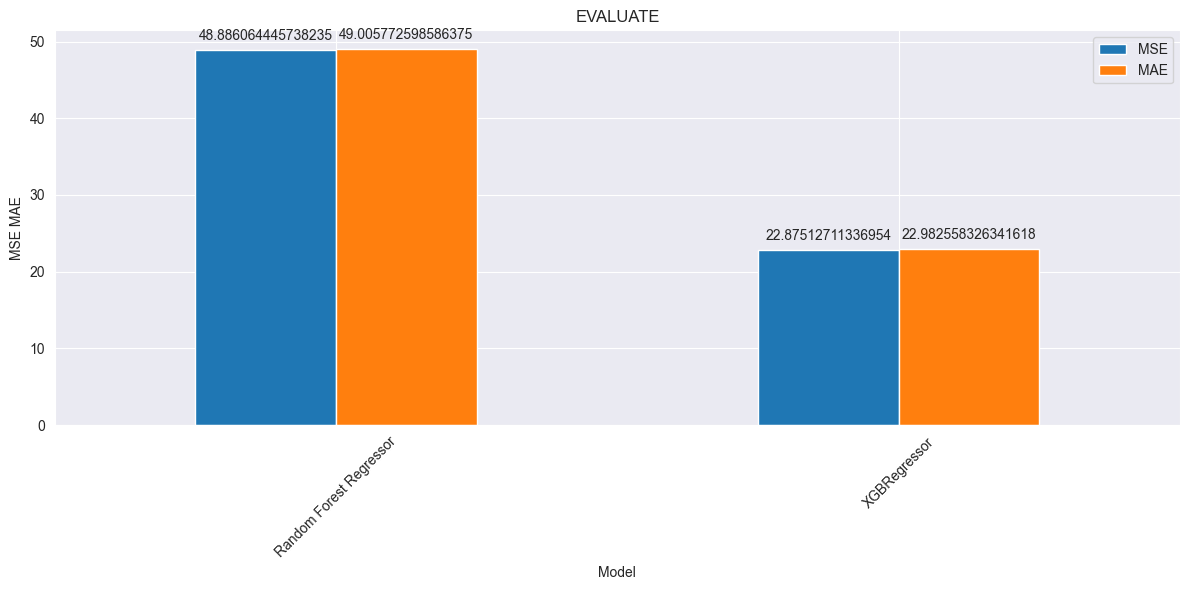

In [65]:
ax=DF.plot(kind='bar',figsize=(12,6))
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points') 
plt.xlabel('Model')
plt.ylabel('MSE MAE')
plt.title('EVALUATE')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

lightGBM

In [66]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import lightgbm as lgb

In [67]:
train_data = lgb.Dataset(X_train, label=Y_train)
test_data = lgb.Dataset(X_test, label=Y_test, reference=train_data)

In [68]:
params = {
    'objective': ['regression'],       # Hồi quy
    'metric': ["mse"],               # Đánh giá bằng RMSE
    'learning_rate': [0.1,0.01,0.03,0.3],           # Tốc độ học
    'max_depth':[ -1,6],                # Không giới hạn độ sâu cây
    'num_leaves':[ 31],               # Số lá trong mỗi cây
    'feature_fraction': [0.8],        # Tỷ lệ đặc trưng được sử dụng
    'bagging_fraction': [0.8],        # Tỷ lệ dữ liệu sử dụng cho mỗi lần học
    'bagging_freq':[ 5],              # Tần suất lấy mẫu lại dữ liệu
    'verbose':[ -1 ]                  # Tắt log chi tiết
}

In [69]:
lightgbm_model=lgb.LGBMRegressor()

In [70]:
LB=GridSearchCV(estimator=lightgbm_model,param_grid=params,cv=5)

In [71]:
LB.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=LGBMRegressor(),
             param_grid={'bagging_fraction': [0.8], 'bagging_freq': [5],
                         'feature_fraction': [0.8],
                         'learning_rate': [0.1, 0.01, 0.03, 0.3],
                         'max_depth': [-1, 6], 'metric': ['mse'],
                         'num_leaves': [31], 'objective': ['regression'],
                         'verbose': [-1]})

In [72]:
lightgbm_model=lgb.LGBMRegressor(**LB.best_params_)

In [73]:
lightgbm_model.fit(X_train,Y_train)

LGBMRegressor(bagging_fraction=0.8, bagging_freq=5, feature_fraction=0.8,
              learning_rate=0.03, metric='mse', objective='regression',
              verbose=-1)

In [94]:
y_pred=lightgbm_model.predict(X_test)

In [95]:
lbrmse=np.sqrt(mean_squared_error(Y_test, y_pred))
lbrmae=mean_absolute_error(Y_test, y_pred)
print(f"RMSE: {lbrmse}")

print(f"MAE: {lbrmae}")

RMSE: 49.637321889926156
MAE: 23.868868617671207


In [76]:
dump(lightgbm_model,'lightgbm_model.joblib')

['lightgbm_model.joblib']

In [96]:
model_name.append("LightGBMRegressor")
mae_values.append(lbrmae)
mse_values.append(lbrmse)


In [97]:
DF

,MSE,MAE
Random Forest Regressor,48.886064,49.005773
XGBRegressor,22.875127,22.982558


In [98]:
data = {'Model': model_name, 'MSE': mse_values, 'MAE': mae_values}

In [99]:
DF=pd.DataFrame(data,index=model_name)


In [100]:
DF 

,Model,MSE,MAE
Random Forest Regressor,Random Forest Regressor,48.886064,22.875127
XGBRegressor,XGBRegressor,49.005773,22.982558
LightGBMRegressor,LightGBMRegressor,49.637322,23.868869


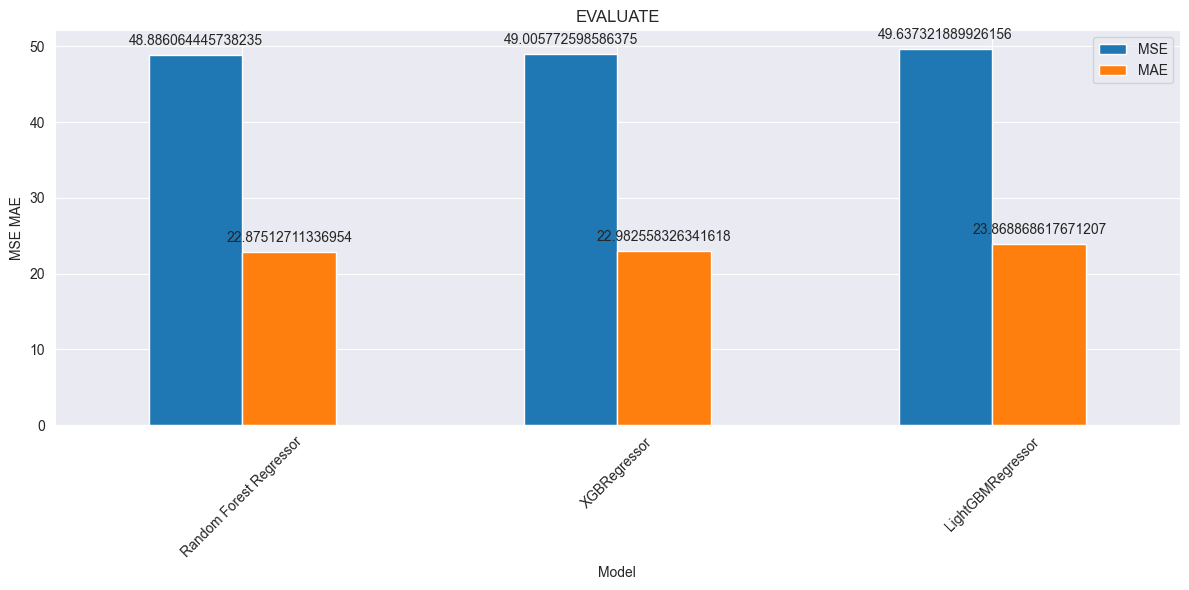

In [101]:
ax=DF.plot(kind='bar',figsize=(12,6))
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points') 
plt.xlabel('Model')
plt.ylabel('MSE MAE')
plt.title('EVALUATE')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()